# Project: Cancer Mortality in the US

In this project I analyze the cancer dataset (https://data.world/nrippner/ols-regression-challenge) with the goal to predict the cancer mortality rate as mean death rate per capita in the U.S. using Generalized Linear Regression. The dataset has 34 columns with 'TARGET_deathRate' being the the variable we would like to perform regression on using the other 33 features and 3,047 instances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Get the features & target variables
raw_data = pd.read_excel('cancer_reg.xlsx', na_values='NaN')
y = raw_data[['TARGET_deathRate']]
X = raw_data.drop('TARGET_deathRate', 'columns')

# Split the data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Load the data
raw_data = X_train
raw_data['deathRate'] = y_train

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [2]:
# See the first 5 rows
raw_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
538,93.000000,42,420.000000,32744,13445,22.0,0.0,"[22640, 34218.1]",48.1,45.9,...,28.9,49.3,26.6,96.965875,1.201780,0.215134,0.400593,55.217156,4.812157,184.1
1295,1962.667684,6,453.549422,45341,2591,12.0,0.0,"(45201, 48021.6]",49.8,49.0,...,37.2,38.8,12.8,91.901273,3.085229,1.195526,0.000000,53.288926,10.810811,134.0
1127,155.000000,65,434.300000,45158,26224,13.1,0.0,"(42724.4, 45201]",44.4,42.9,...,41.4,42.7,21.4,94.327017,2.347701,0.441609,0.362346,49.779647,4.951691,174.0
2840,309.000000,152,409.000000,34354,56486,24.6,0.0,"(34218.1, 37413.8]",43.6,42.4,...,34.8,42.9,22.8,96.684287,1.283785,0.338947,0.091323,50.552440,3.668414,193.2
1090,20.000000,7,307.100000,57242,4691,9.6,0.0,"(54545.6, 61494.5]",52.9,51.2,...,31.7,35.0,13.9,97.729258,0.000000,0.829694,0.000000,56.868687,2.292994,106.1


In [3]:
# Get a snapshot for summary statistics
raw_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,597.885621,182.821295,448.400079,47056.307223,1.006896e+05,16.844278,159.434147,45.708255,39.556191,42.130394,...,41.249156,36.233021,19.192636,83.684369,8.925588,1.247173,2.046204,51.311920,5.639744,178.707458
std,1275.296915,449.899806,55.182698,11764.169112,2.811766e+05,6.291936,552.034466,47.583227,5.247479,5.331173,...,9.389506,7.691048,5.966257,16.260348,14.259865,2.616385,3.632721,6.469965,1.990063,27.412313
min,7.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.900000,0.000000,22.300000,22.400000,22.300000,...,14.300000,11.200000,2.600000,11.008762,0.000000,0.000000,0.000000,23.885628,0.000000,66.300000
25%,74.000000,28.000000,420.900000,39078.750000,1.166400e+04,12.200000,0.000000,37.775000,36.400000,39.100000,...,34.500000,30.800000,14.900000,77.044238,0.620624,0.247437,0.296332,47.825737,4.538801,161.700000
50%,171.000000,61.000000,453.549422,45201.000000,2.579150e+04,15.900000,0.000000,40.900000,39.500000,42.400000,...,41.000000,36.450000,18.800000,90.053620,2.233183,0.543373,0.851921,51.686980,5.354838,178.600000
75%,529.250000,151.250000,480.900000,52535.250000,6.966075e+04,20.400000,86.797730,44.100000,42.600000,45.400000,...,47.800000,41.600000,23.000000,95.368192,10.185748,1.206212,2.243810,55.386831,6.478029,194.825000
max,24965.000000,9445.000000,1206.900000,122641.000000,5.238216e+06,47.000000,9762.308998,619.200000,64.700000,65.700000,...,68.900000,65.100000,46.600000,99.693045,85.947799,37.156932,41.930251,71.703057,21.326165,362.800000


In [4]:
# Note that MedianAge has extreme values that don't make sense in the context of age
raw_data[['MedianAge']].sort_values(by='MedianAge', ascending=False).head(sum(raw_data['MedianAge'] > 100))

,MedianAge
606,619.2
1579,579.6
225,546.0
1855,536.4
1312,535.2
2000,523.2
1767,519.6
2835,511.2
425,508.8
2966,508.8


In [5]:
# Drop the extreme values for the MedianAge data
erroneous_data = raw_data[raw_data['MedianAge'] > 100].index.tolist()
raw_data.drop(erroneous_data, axis='index', inplace=True)
raw_data['MedianAge'].describe()

count    2109.000000
mean       40.802466
std         5.231428
min        22.300000
25%        37.700000
50%        40.900000
75%        43.900000
max        65.300000
Name: MedianAge, dtype: float64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 538 to 860
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2109 non-null   float64
 1   avgDeathsPerYear         2109 non-null   int64  
 2   incidenceRate            2109 non-null   float64
 3   medIncome                2109 non-null   int64  
 4   popEst2015               2109 non-null   int64  
 5   povertyPercent           2109 non-null   float64
 6   studyPerCap              2109 non-null   float64
 7   binnedInc                2109 non-null   object 
 8   MedianAge                2109 non-null   float64
 9   MedianAgeMale            2109 non-null   float64
 10  MedianAgeFemale          2109 non-null   float64
 11  Geography                2109 non-null   object 
 12  AvgHouseholdSize         2109 non-null   float64
 13  PercentMarried           2109 non-null   float64
 14  PctNoHS18_24           

In [7]:
raw_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1577
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over           94
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     421
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [8]:
raw_data = raw_data.astype({'Geography' : 'string', 'binnedInc' : 'category'})
raw_data[['Geography','binnedInc']].dtypes

Geography      string
binnedInc    category
dtype: object

## Analyzing Missing Data

Above we can see that there are 3 columns with missing data. The analysis below is to determine weather it is appropriate to drop the columns or fill in the missing data.

In [9]:
# Isolate column names with missing values
column_names = raw_data.loc[:, raw_data.isnull().sum() != 0].columns
column_names = list(column_names)
column_names

['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']

In [10]:
# Get the amount and percent of data missing in each column with missing data
for column in column_names:
    missing_amount = raw_data[column].isna().sum()
    print("Missing data in", column)
    print("\tAmount of missing data values:", missing_amount)
    print("\tAmount of non-missing data values:", len(raw_data) - missing_amount)
    print("\tPercent of data missing {0:.2f}".format(missing_amount/len(raw_data)))

Missing data in PctSomeCol18_24
	Amount of missing data values: 1577
	Amount of non-missing data values: 532
	Percent of data missing 0.75
Missing data in PctEmployed16_Over
	Amount of missing data values: 94
	Amount of non-missing data values: 2015
	Percent of data missing 0.04
Missing data in PctPrivateCoverageAlone
	Amount of missing data values: 421
	Amount of non-missing data values: 1688
	Percent of data missing 0.20


In [11]:
# Get summary statistics for the missing columns
raw_data[column_names].describe()

,PctSomeCol18_24,PctEmployed16_Over,PctPrivateCoverageAlone
count,532.000000,2015.000000,1688.000000
mean,40.829323,54.234342,48.462796
std,11.464739,8.231423,9.947308
min,7.100000,17.600000,16.800000
25%,33.775000,48.800000,41.000000
50%,40.000000,54.400000,48.400000
75%,46.400000,60.400000,55.600000
max,79.000000,80.100000,77.100000


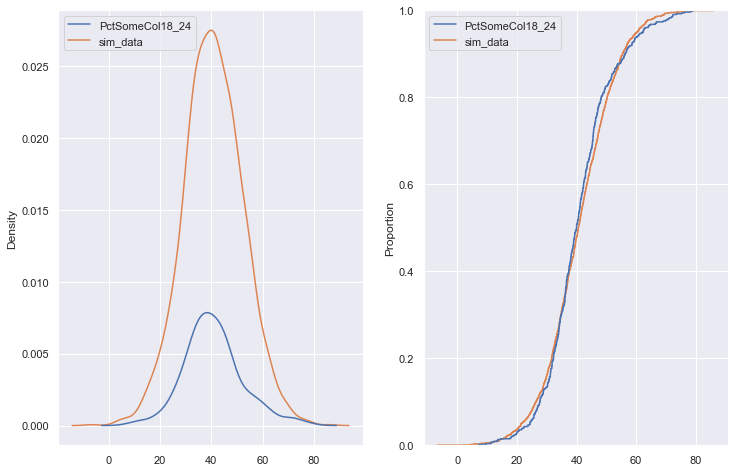

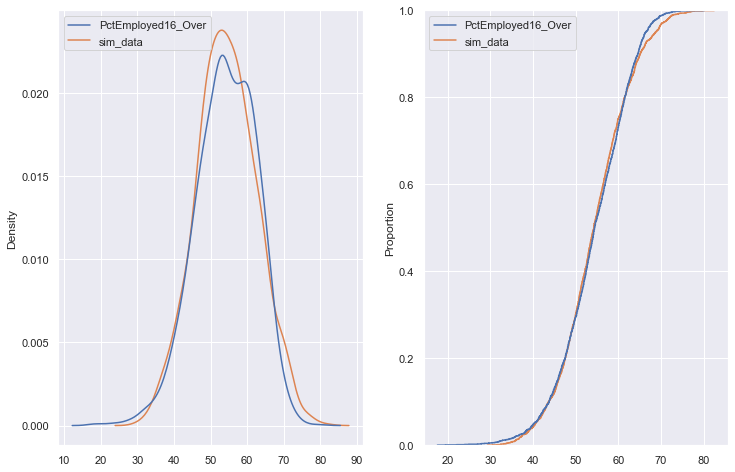

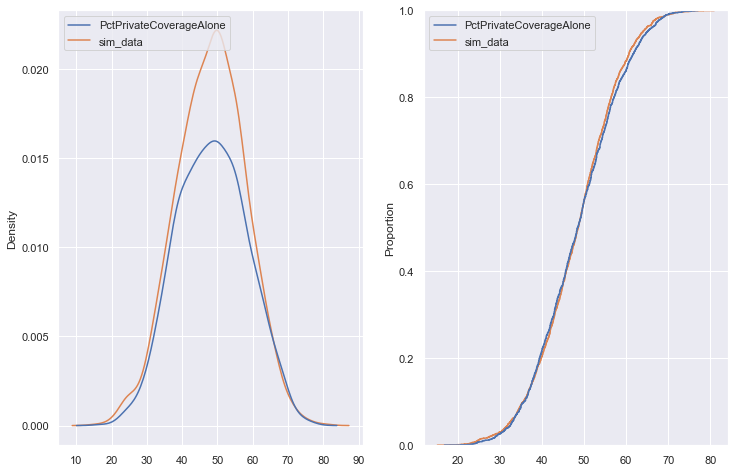

In [12]:
from numpy.random import normal

sns.set(rc={'figure.figsize':(12, 8)})
for column in column_names:
    # Created simulated data to compare to the actual observed data
    mean, std = np.mean(raw_data[column]), np.std(raw_data[column])
    simulated_data = normal(mean, std, len(raw_data[column]))
    
    # Join the observed data to the simulated data
    kde_df = raw_data[[column]].copy(deep=True)
    kde_df['sim_data'] = simulated_data.tolist()
    
    # Create the kde plot of the observed and simulated data
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    sns.kdeplot(data=kde_df, ax=ax1)
    sns.move_legend(ax1, loc=2)
    #ax1.set_xticklabels(labels="{column} KDE Plot".format(column))
    
    # Create the ECDF for the missing column
    sns.ecdfplot(kde_df, ax=ax2)
    sns.move_legend(ax2, loc=2)
    #ax2.set_xticklabels(labels="{column} ECDF Plot".format(column))
    
    # Save the plots
    #plt.savefig(column + ".png", dpi=300)

In [13]:
# Dropping columns with missing data - AKA Complete Case Analysis

print('raw_data shape before deletion of missing data is', raw_data.shape)

# Drop two columns with a large amount of data missing
raw_data.drop(['PctSomeCol18_24', 'PctPrivateCoverageAlone'], axis='columns', inplace=True)
# Drop rows with missing data
index_missing_data = raw_data[raw_data['PctEmployed16_Over'].isnull()].index.tolist()
raw_data.drop(index_missing_data, axis='index', inplace=True)

print('raw_data shape after deletion of missing data is', raw_data.shape)
print('Verifiy there is no missing data:')
print(raw_data.isna().sum() > 0)

raw_data shape before deletion of missing data is (2109, 34)
raw_data shape after deletion of missing data is (2015, 32)
Verifiy there is no missing data:
avgAnnCount               False
avgDeathsPerYear          False
incidenceRate             False
medIncome                 False
popEst2015                False
povertyPercent            False
studyPerCap               False
binnedInc                 False
MedianAge                 False
MedianAgeMale             False
MedianAgeFemale           False
Geography                 False
AvgHouseholdSize          False
PercentMarried            False
PctNoHS18_24              False
PctHS18_24                False
PctBachDeg18_24           False
PctHS25_Over              False
PctBachDeg25_Over         False
PctEmployed16_Over        False
PctUnemployed16_Over      False
PctPrivateCoverage        False
PctEmpPrivCoverage        False
PctPublicCoverage         False
PctPublicCoverageAlone    False
PctWhite                  False
PctBlack     

# Feature Analysis

Analyze scatter plots, correlations, covariances, look for interactions terms, and look for non-linear terms. Based on the amount of available features after dropping missing data there are 2^31 possible linear regressin models, which does not include the amount of models possible if any data is transformed or interaction terms are found. So we need to reduce the amount of models we are searching through by finding the best features.

1) Get the correlations and find the most positively and negatively correlated features.<br> 
2) Get scatter plots for these features and the target variable.<br> 
3) Determine if a no-linear relationship would be better.<br> 
3) Look for non-linear relationships in other features using scatter plots.<br> 

In [14]:
# Look at the feature (pearson) correlations with the target variable TARGET_deathRate
cancer_corr = raw_data.corr().sort_values('deathRate', ascending=False)

In [15]:
# The top 5 correlations
print("The 5 most positively correlated features with deathRate")
pos_corr = cancer_corr.nlargest(6, 'deathRate')[['deathRate']]
pos_corr

The 5 most positively correlated features with deathRate


,deathRate
deathRate,1.000000
PctPublicCoverageAlone,0.432780
incidenceRate,0.424113
PctHS25_Over,0.418196
povertyPercent,0.402182
PctPublicCoverage,0.386026


In [16]:
# The 5 most negative correlations
print("The 5 most negatively correlated features with deathRate")
neg_corr = cancer_corr.nsmallest(5, "deathRate")[['deathRate']]
neg_corr

The 5 most negatively correlated features with deathRate


,deathRate
PctBachDeg25_Over,-0.484193
medIncome,-0.406671
PctEmployed16_Over,-0.392374
PctPrivateCoverage,-0.376936
PctMarriedHouseholds,-0.295769


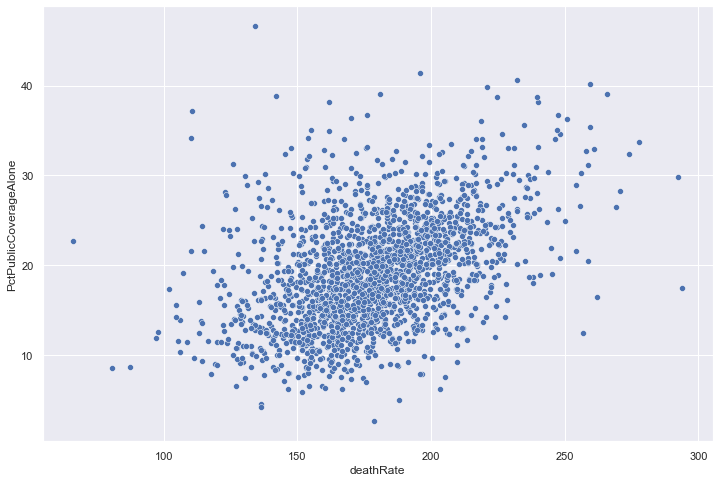

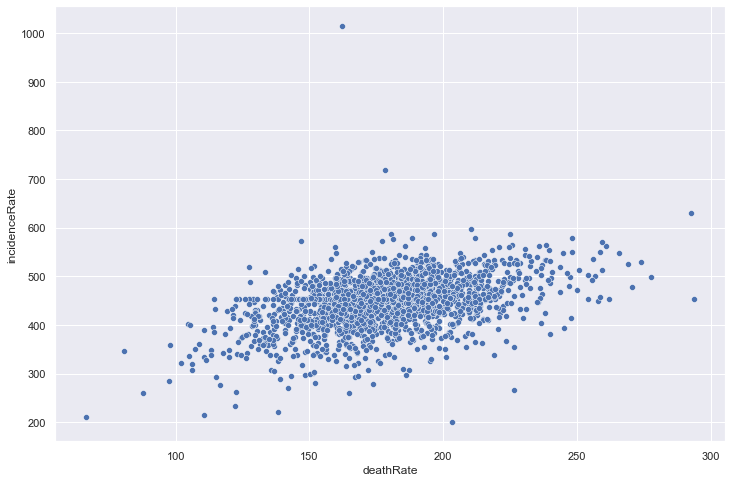

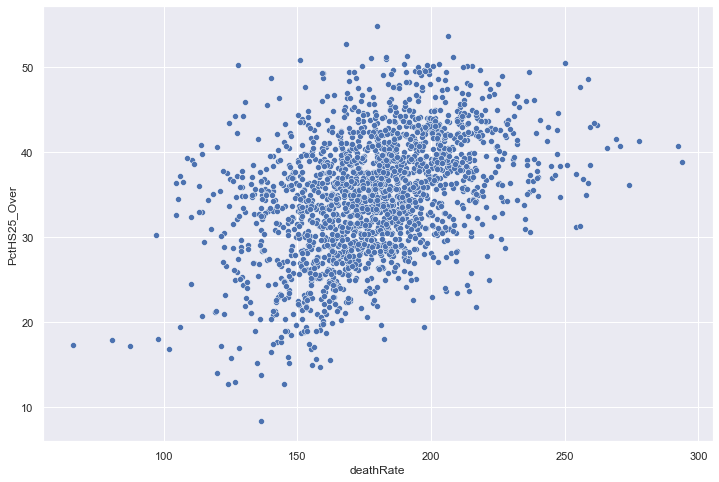

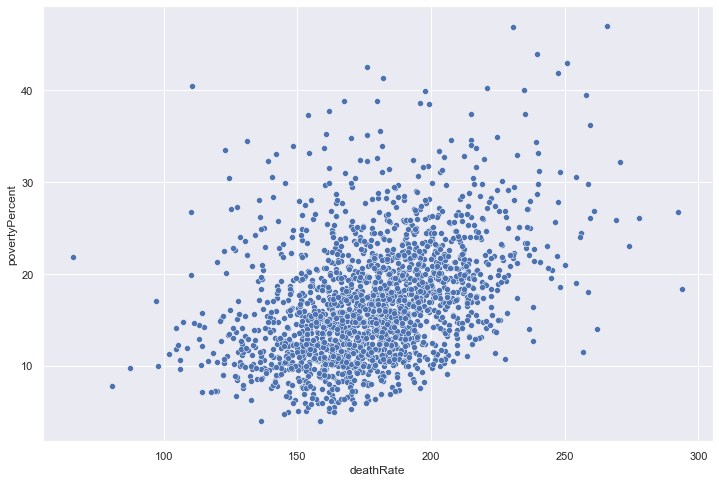

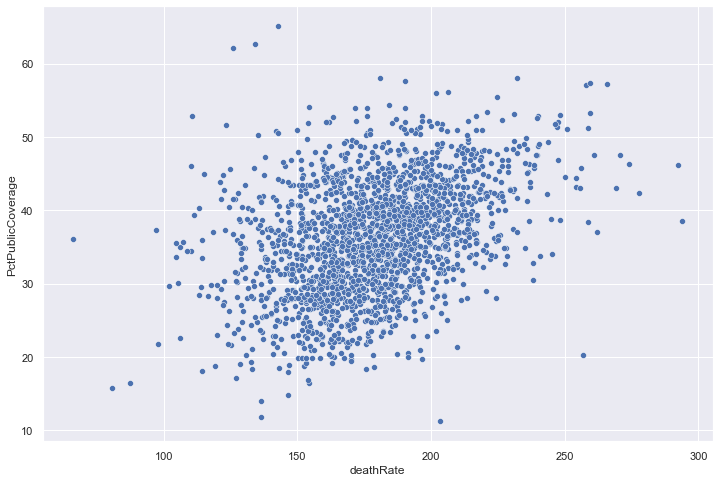

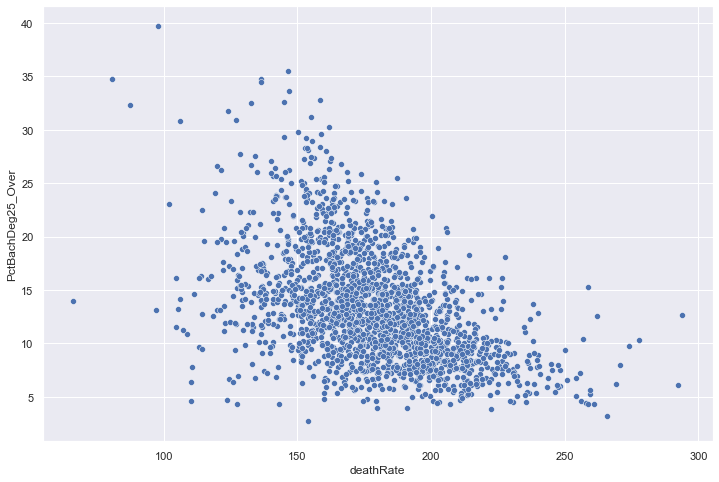

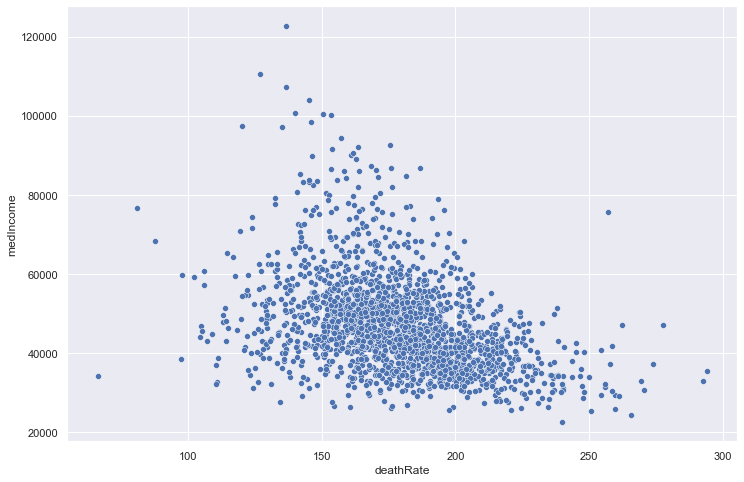

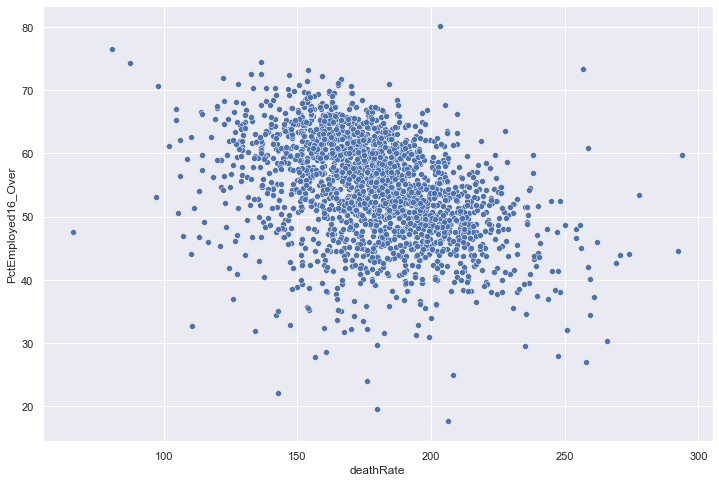

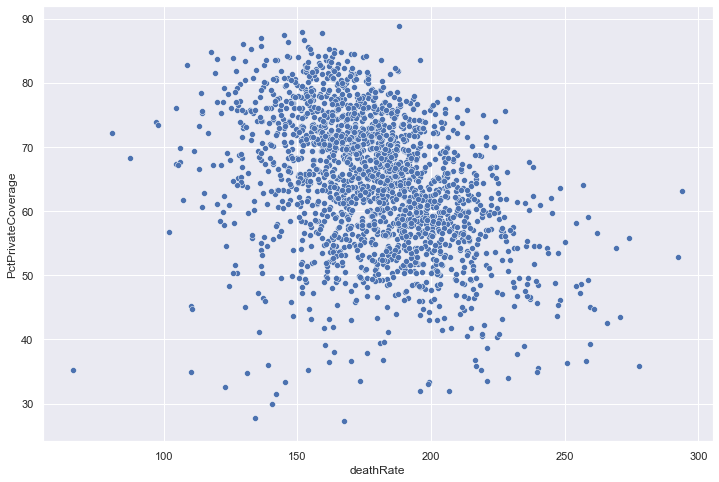

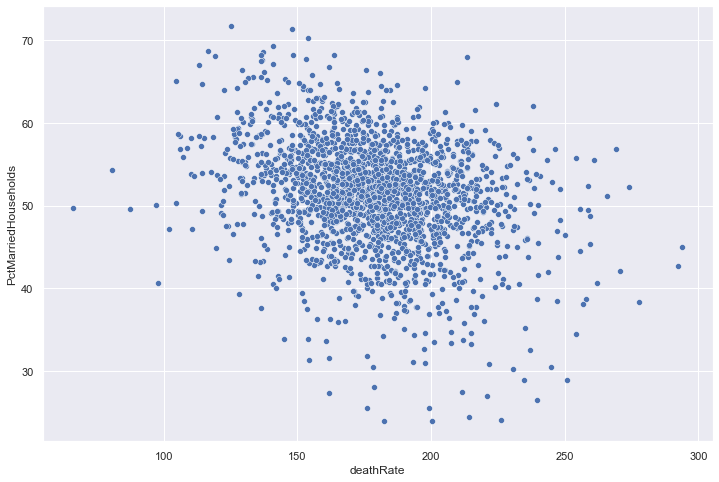

In [17]:
# Get the columns with a high correlation with the target variable deathRate
high_corr_col = list(pos_corr.index) + list(neg_corr.index)

# Generate the scatter plot for the columns with high correlations
target_col = high_corr_col[0]

# Generate scatter plots for features and the target varaible
for col in high_corr_col[1:]:
    sns.scatterplot(data=raw_data, x=target_col, y=col)
    plt.show()




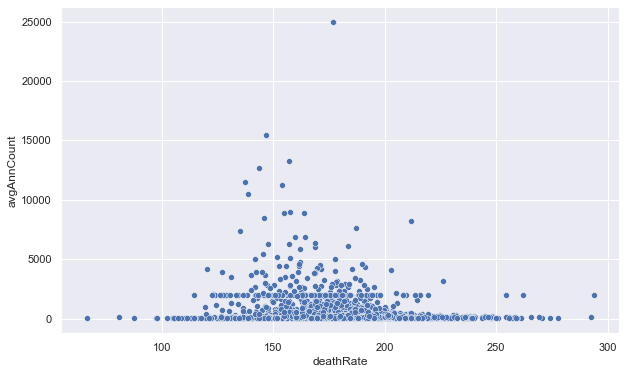

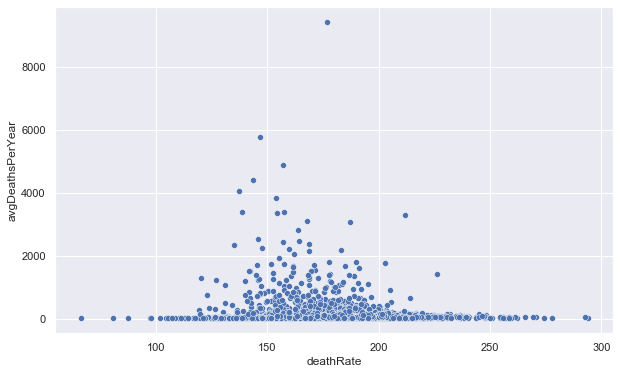

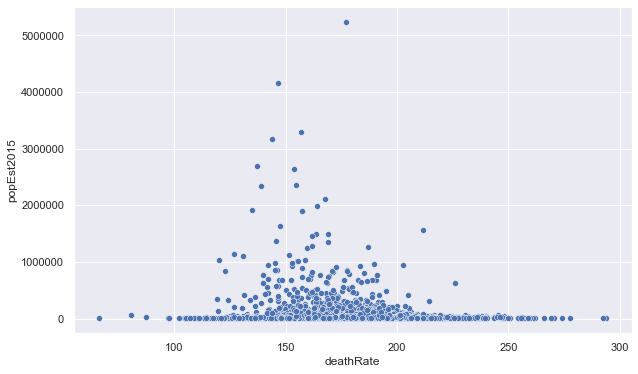

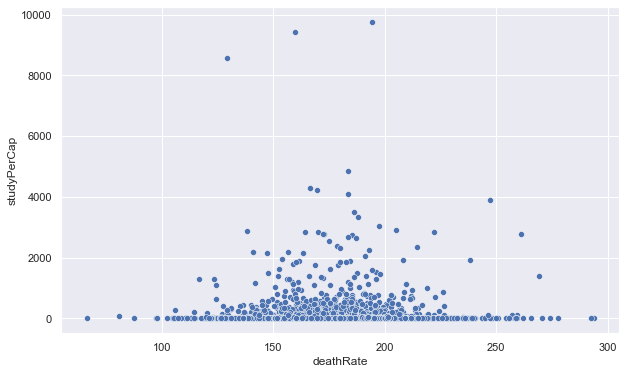

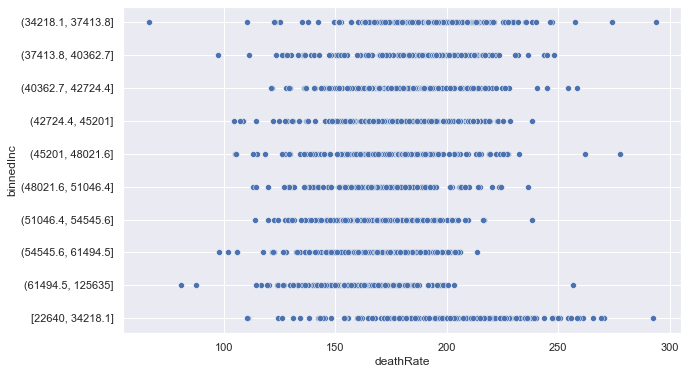

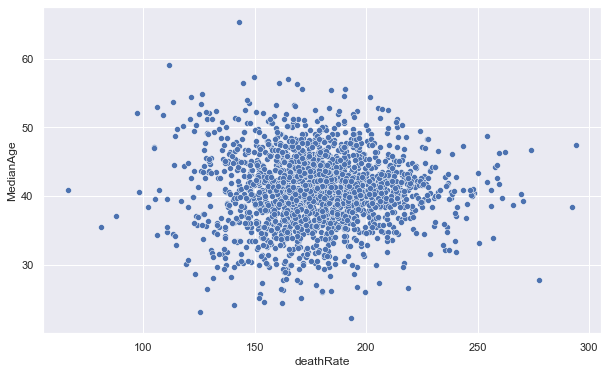

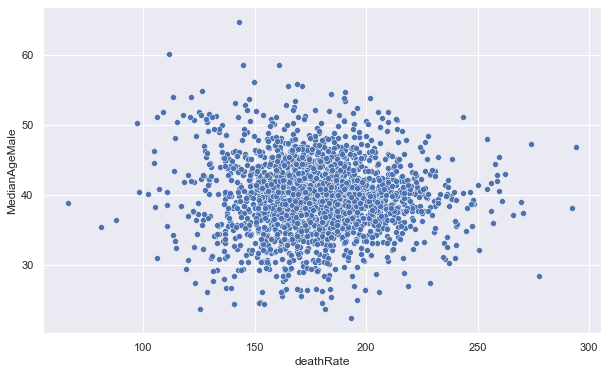

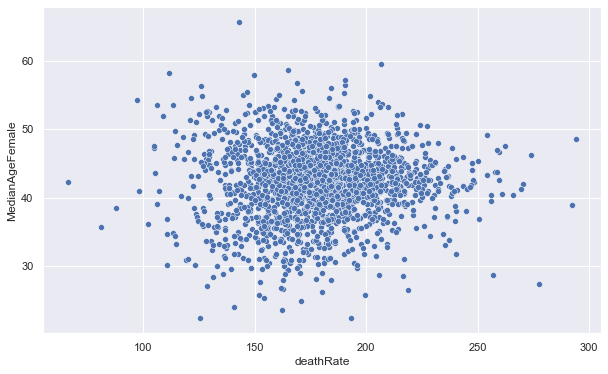

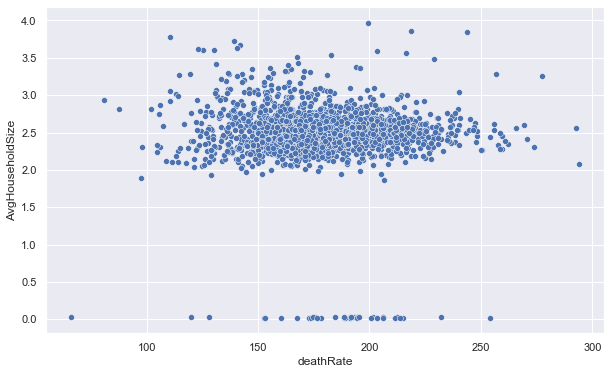

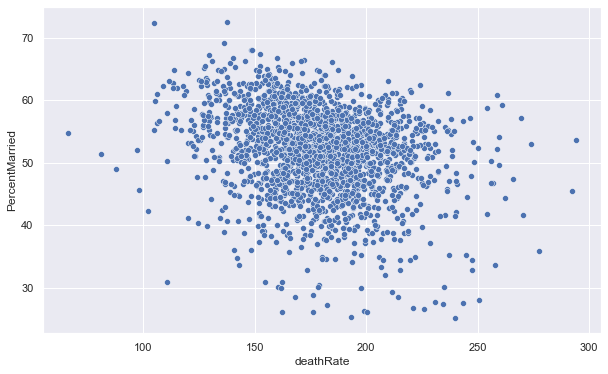

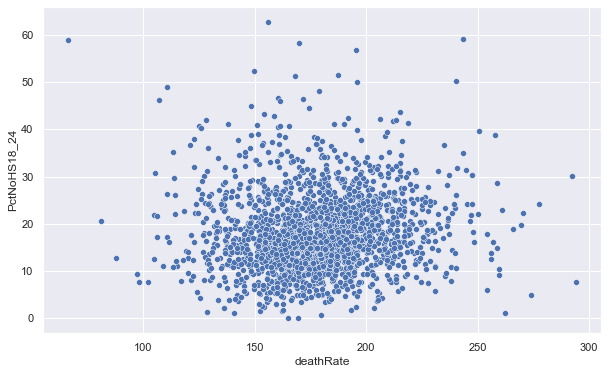

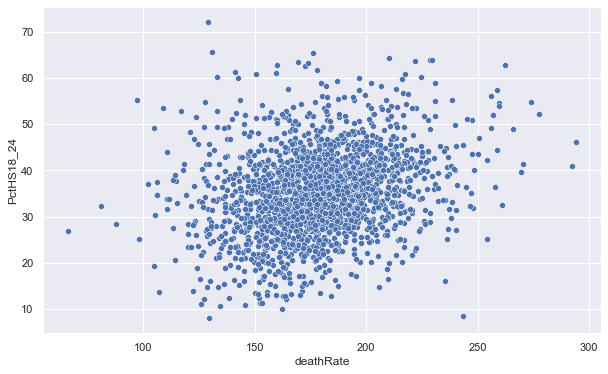

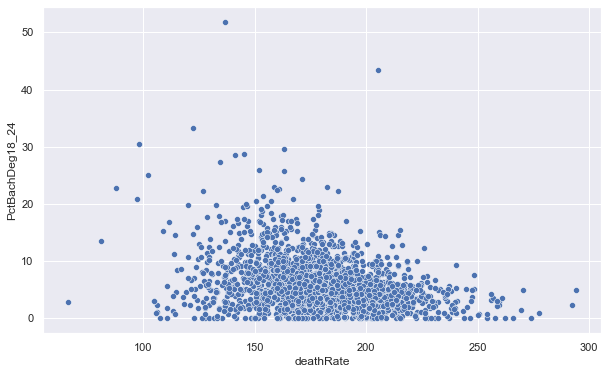

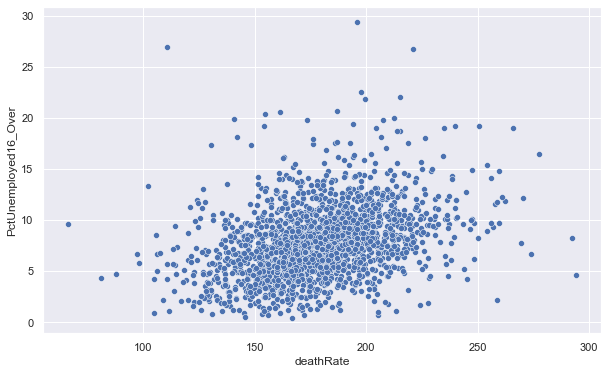

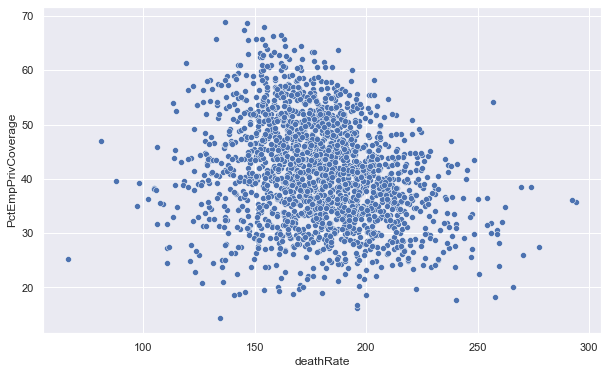

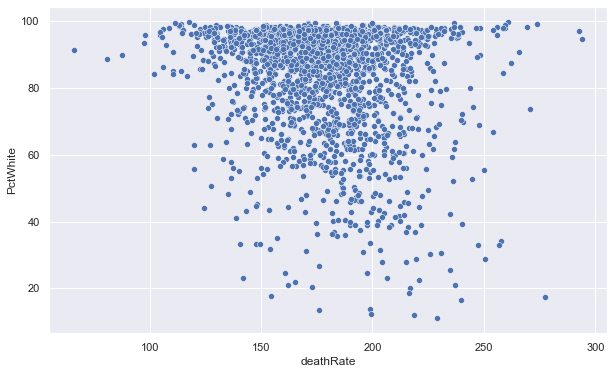

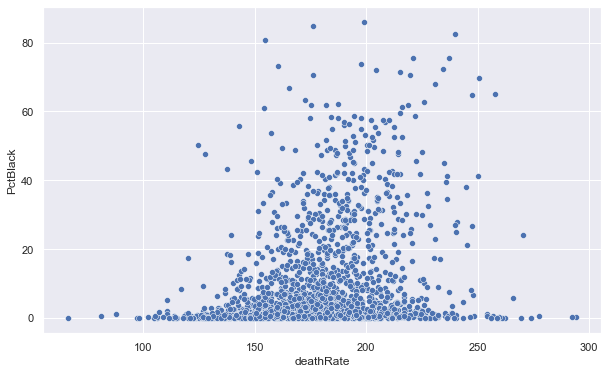

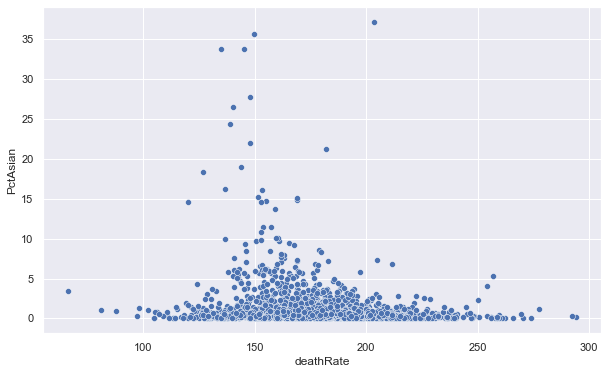

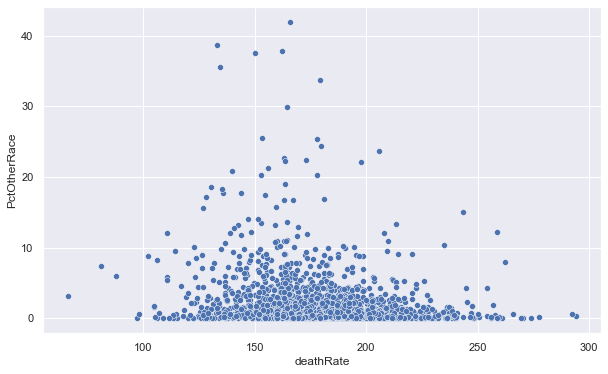

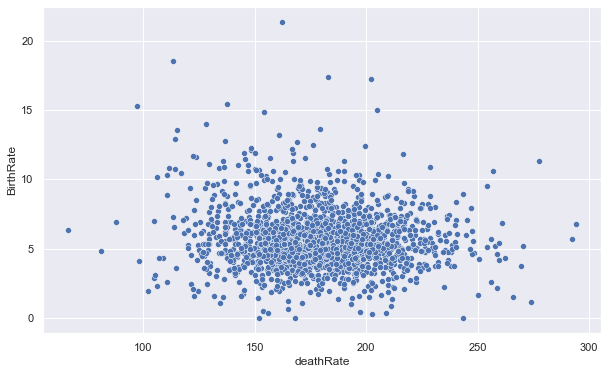

In [52]:
# Gets the columns we haven't already looked and excludes the column of county names
low_corr_cols = [col for col in raw_data.columns if col not in high_corr_col and col != 'Geography']

sns.set(rc={'figure.figsize':(10,6)})
# Get scatter plots for all columns and the target varaible to look for non-linear relationships
for col in low_corr_cols:
    sns.scatterplot(data=raw_data, x='deathRate', y=col)
    txt = 'C:/Users/David/Desktop/Projects/Cancer & Generalized Regression/pics{0}.png'.format(col)
    plt.savefig(txt, dpi=300)
    plt.show()


In [19]:
raw_data.sort_values('popEst2015', ascending=False).head(10)[['popEst2015','Geography']]

,popEst2015,Geography
2373,5238216,"Cook County, Illinois"
2741,4167947,"Maricopa County, Arizona"
1020,3299521,"San Diego County, California"
1012,3169776,"Orange County, California"
1467,2693117,"Miami-Dade County, Florida"
386,2636735,"Kings County, New York"
1015,2361026,"Riverside County, California"
2086,2339150,"Queens County, New York"
112,2114801,"Clark County, Nevada"
1969,1982498,"Tarrant County, Texas"


In [20]:
'''
Checking if a log transformation yields a linear relatonship with the target data.

Result: A log transformation didn't yield any new linear relationships
'''

numeric_data = np.log(raw_data.select_dtypes('number'))
numeric_data.corr()[['deathRate']].sort_values(by='deathRate', ascending=False)


,deathRate
deathRate,1.000000
incidenceRate,0.443904
PctHS25_Over,0.426511
PctPublicCoverageAlone,0.419767
povertyPercent,0.396151
PctPublicCoverage,0.375923
PctUnemployed16_Over,0.352912
PctHS18_24,0.265849
PctBlack,0.246242
PctNoHS18_24,0.085521


In [21]:
from pandas.plotting import scatter_matrix

#scatter_matrix(raw_data, figsize=(18,10))

# Buidling Regression Models

From the scatter plots above it doesn't seem like there are any polynomial relationships between the target variable, 'deathRate', and the features. I would still like to search for possible interaction terms when building models based on the data in a way that makes sense, then use a t-test to determine if these interaction terms are significant.

With the large amount of features to choose from the total amount of linear regression models is significantly large (2^31). Thus, I will limit the final model to having at most 10 features to predict the target varible 'deathRate.'

1) Use forward/backward selection<br>
2) Use the highest correlated features<br>
3) Use randomized grid search?<br>
4) <br>

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import FeatureUnion


### Creating the pipeline that the test data will go through to be in the same format as the training data ###


# To remove extreme values in the 'MedianAge' column
rm_extr_data = FunctionTransformer(lambda df: df.drop(df[df['MedianAge'] > 100].index.tolist(), axis='index'), \
                                       validate=False)

# To remove null data in the 'PctEmployed16_Over' column
rm_null_data = FunctionTransformer(lambda df: df.drop(df[df['PctEmployed16_Over'].isnull()].index.tolist(), axis='index'), \
                                      validate=False)

# Drop columns with to much missing dta
cols_to_drop = ['PctSomeCol18_24', 'PctPrivateCoverageAlone', 'Geography']
rm_cols = FunctionTransformer(lambda df: df.drop(cols_to_drop, axis='columns'), validate=False)

# Turn categorical data to numbers
#cat_transformer = FunctionTransformer(replace_categorical)

# Add the target data to the test data to transform both sets of data together
X_test['deathRate'] = y_test

# The pipeline the data will be transformed by
data_pipeline = Pipeline([
                ('rm_extr_data', rm_extr_data), # Remove extreme values from the 'MedianAge' column
                ('rm_null_data', rm_null_data), # Remove rows with null data in the 'PctEmployed16_Over' column
                ('rm_cols', rm_cols), # Remove columns with a large amount of missing data
                ])


# Process the training data
X_test = data_pipeline.fit_transform(X_test)
y_test = X_test[['deathRate']]
X_test.drop('deathRate', axis='columns', inplace=True)

In [28]:
# Process categorical data
ord_encd = OrdinalEncoder()
ord_binnedInc = ord_encd.fit_transform(X_test[['binnedInc']])
X_test['binnedInc'] = ord_binnedInc



# Drop column that isn't useful
X_train.drop('Geography', axis='columns', inplace=True)

# Process categorical data
ord_binnedInc = ord_encd.fit_transform(X_train[['binnedInc']])
X_train['binnedInc'] = ord_binnedInc

In [24]:
# Process the training data
y_train = raw_data[['deathRate']]
X_train = raw_data.drop('deathRate', axis='columns')

In [25]:
def display_cross_val(estimator, cols):
    neg_rmse_scores = cross_val_score(estimator, X_train[cols], y_train,
                                      scoring="neg_root_mean_squared_error", cv=10)

    # Evaluate the model on the trainings set using cross-validation and the Root-Mean-Squared-Error metric
    rmse_scores = -neg_rmse_scores
    rmse_mean, rmse_std = np.mean(rmse_scores), np.std(rmse_scores)


    txt = "RMSE is:\n\tRMSE Mean:{0:.2f}\n\tRMSE Std:{1:.2f}"\
             .format(rmse_mean, rmse_std)
    print(txt)
    return rmse_scores

In [26]:
from sklearn.metrics import mean_squared_error as mse
# Model with the 10 most correlated features
high_corr_cols = [col for col in high_corr_col if col != 'deathRate']

# Linear Regression model with the most (pearson) correlated features
lm = LinearRegression()
rmse_scores = display_cross_val(lm, high_corr_cols)



RMSE is:
	RMSE Mean:19.62
	RMSE Std:0.70


In [29]:
# Using forward selection to fit a linear regression model
forward_selection_lm = SequentialFeatureSelector(lm, n_features_to_select=10, scoring='neg_root_mean_squared_error', cv=10)
forward_selection_lm.fit_transform(X_train, y_train)
forward_features = forward_selection_lm.get_feature_names_out()
print('Features for forward selection:\n', forward_features)
scores = display_cross_val(lm, forward_features)

Features for forward selection:
 ['avgAnnCount' 'incidenceRate' 'PctHS18_24' 'PctHS25_Over'
 'PctBachDeg25_Over' 'PctPrivateCoverage' 'PctEmpPrivCoverage'
 'PctOtherRace' 'PctMarriedHouseholds' 'BirthRate']
RMSE is:
	RMSE Mean:19.19
	RMSE Std:0.82


In [30]:
backward_selection_lm = SequentialFeatureSelector(lm, n_features_to_select=10, direction='backward',
                                                 scoring='neg_root_mean_squared_error', cv=10)
backward_selection_lm.fit_transform(X_train, y_train)
backward_features = backward_selection_lm.get_feature_names_out()
print('Features for backward selection:\n', backward_features)
scores = display_cross_val(lm, backward_features)

Features for backward selection:
 ['incidenceRate' 'MedianAge' 'PercentMarried' 'PctHS18_24'
 'PctBachDeg25_Over' 'PctPrivateCoverage' 'PctEmpPrivCoverage'
 'PctOtherRace' 'PctMarriedHouseholds' 'BirthRate']
RMSE is:
	RMSE Mean:19.22
	RMSE Std:0.83


In [31]:
high_corr_cols

['PctPublicCoverageAlone',
 'incidenceRate',
 'PctHS25_Over',
 'povertyPercent',
 'PctPublicCoverage',
 'PctBachDeg25_Over',
 'medIncome',
 'PctEmployed16_Over',
 'PctPrivateCoverage',
 'PctMarriedHouseholds']

# Model Analysis

1) F-test <br>
2) Residual Analysis

In [32]:
forward_model = sm.OLS(y_train, sm.add_constant(X_train[forward_features]))
forward_results = forward_model.fit()
forward_results.summary()

C:\Users\David\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.33e-296
Time:                        06:52:42   Log-Likelihood:                -8793.2
No. Observations:                2015   AIC:                         1.761e+04
Df Residuals:                    2004   BIC:                         1.767e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  160.9685      7.138     22.551      0.000     146.970     174.967
avgAnnCount             -0.0009      0.000     -2.540      0.011      -0.002      -0.000
incidenceRate            0.1943      0.009     22.223      0.000       0.177       0.211
PctHS18_24               0.2963      0.054      5.443      0.000       0.190       0.403
PctHS25_Over             0.3112      0.108      2.874      0.004       0.099       0.524
PctBachDeg25_Over       -1.3378      0.168     -7.947      0.000      -1.668      -1.008
PctPrivateCoverage      -0.8676      0.089     -9.795      0.000      -1.041      -0.694
PctEmpPrivCoverage       0.5385      0.084      6.411      0.000       0.374       0.703
PctOtherRace            -0.7792      0.132     -5.892      0.000      -1.039      -0.520
PctMarriedHouseholds    -0.6366      0.081     -7.891      0.000      -0.795      -0.478
BirthRate               -0.8331      0.217     -3.838      0.000      -1.259      -0.407
==============================================================================
Omnibus:                       93.133   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.458
Skew:                           0.009   Prob(JB):                     5.20e-69
Kurtosis:                       4.935   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
high_corr_model = sm.OLS(y_train, sm.add_constant(X_train[high_corr_cols]))
high_corr_results = high_corr_model.fit()
high_corr_results.summary()

C:\Users\David\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          6.47e-277
Time:                        06:52:46   Log-Likelihood:                -8838.4
No. Observations:                2015   AIC:                         1.770e+04
Df Residuals:                    2004   BIC:                         1.776e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    150.8125     15.990      9.432      0.000     119.453     182.172
PctPublicCoverageAlone     0.5521      0.256      2.161      0.031       0.051       1.053
incidenceRate              0.2065      0.009     23.062      0.000       0.189       0.224
PctHS25_Over               0.8039      0.105      7.654      0.000       0.598       1.010
povertyPercent             0.0501      0.186      0.269      0.788      -0.315       0.415
PctPublicCoverage         -0.5630      0.162     -3.469      0.001      -0.881      -0.245
PctBachDeg25_Over         -1.0877      0.178     -6.113      0.000      -1.437      -0.739
medIncome               5.886e-05   8.39e-05      0.701      0.483      -0.000       0.000
PctEmployed16_Over        -0.3374      0.104     -3.231      0.001      -0.542      -0.133
PctPrivateCoverage        -0.3707      0.112     -3.308      0.001      -0.590      -0.151
PctMarriedHouseholds      -0.5878      0.094     -6.255      0.000      -0.772      -0.404
==============================================================================
Omnibus:                      100.281   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.629
Skew:                           0.018   Prob(JB):                     1.33e-78
Kurtosis:                       5.066   Cond. No.                     1.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
backward_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          8.66e-296
Time:                        09:05:57   Log-Likelihood:                -8794.5
No. Observations:                2015   AIC:                         1.761e+04
Df Residuals:                    2004   BIC:                         1.767e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  182.3344      7.046     25.878      0.000     168.517     196.152
incidenceRate            0.1920      0.009     22.059      0.000       0.175       0.209
MedianAge               -0.3370      0.118     -2.850      0.004      -0.569      -0.105
PercentMarried           0.4833      0.154      3.139      0.002       0.181       0.785
PctHS18_24               0.3549      0.054      6.566      0.000       0.249       0.461
PctBachDeg25_Over       -1.8095      0.114    -15.934      0.000      -2.032      -1.587
PctPrivateCoverage      -0.7854      0.099     -7.960      0.000      -0.979      -0.592
PctEmpPrivCoverage       0.4831      0.099      4.882      0.000       0.289       0.677
PctOtherRace            -1.0043      0.126     -7.965      0.000      -1.252      -0.757
PctMarriedHouseholds    -0.9879      0.149     -6.614      0.000      -1.281      -0.695
BirthRate               -1.1252      0.227     -4.959      0.000      -1.570      -0.680
==============================================================================
Omnibus:                       91.841   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.913
Skew:                           0.001   Prob(JB):                     2.26e-67
Kurtosis:                       4.912   Cond. No.                     7.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from sklearn.metrics import mean_squared_error as mse

# Based on the RMSE and t-test, R^2, and significance measures the best model is the forward selection model
lm = LinearRegression()
lm.fit(X_train[forward_features], y_train)

# RMSE for the test data
predictions = lm.predict(X_test[forward_features])
rmse = mse(y_test, predictions, squared=False)
print('Test RMSE:', rmse)

# RMSE for the training data
predictions = lm.predict(X_train[forward_features])
rmse = mse(y_train, predictions, squared=False)
print('Train RMSE:', rmse)

Test RMSE: 21.07930326859057
Train RMSE: 19.008930535848798


In [36]:
predictions = lm.predict(X_train[forward_features])
residuals = (y_train - predictions)

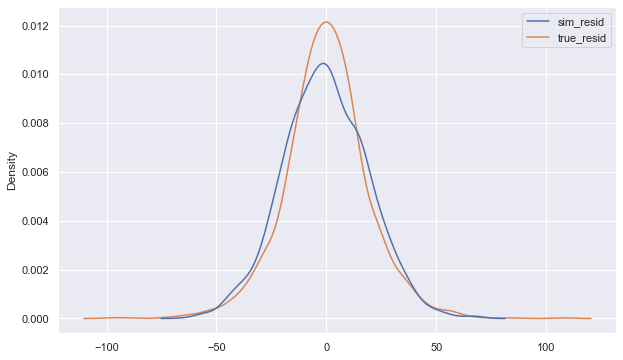

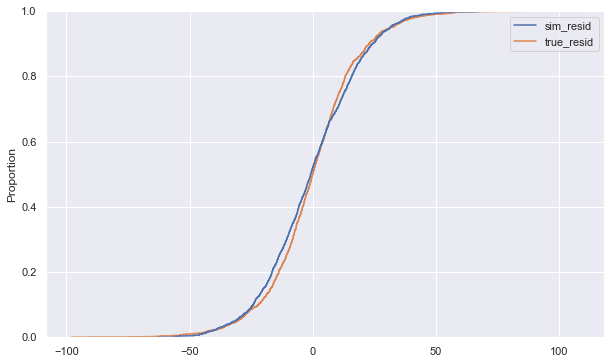

In [119]:
res_mean, res_std = np.mean(residuals), np.std(residuals)
sim_data = normal(res_mean, res_std, len(residuals))
res_df = pd.DataFrame({'sim_resid':sim_data,
                       'true_resid': residuals.squeeze()})

sns.kdeplot(data=res_df)
plt.savefig('res_kde.png', dpi=300)
plt.show()
sns.ecdfplot(data=res_df)
plt.savefig('res_ecdf.png', dpi=300)

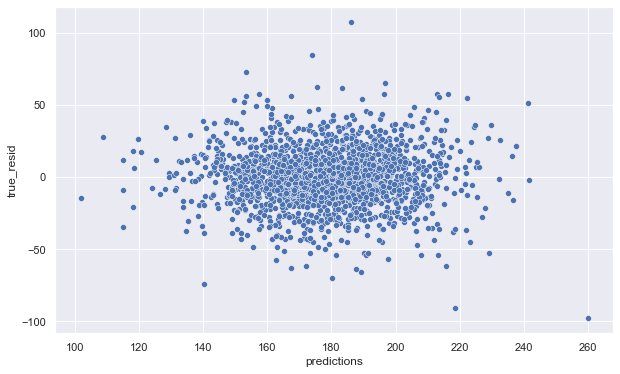

In [120]:
res_df['predictions'] = predictions
sns.scatterplot(x='predictions', y='true_resid', data=res_df)
plt.savefig('res_var.png', dpi=300)

In [78]:
np.std(X_train[forward_features]).tolist() + [0]

[1303.3370902651804,
 52.87102840388998,
 9.059708451504505,
 6.966974254119187,
 5.189152683290796,
 10.487079902515724,
 9.375425076419598,
 3.6803016052287205,
 6.448010968276073,
 1.997918797723815,
 0]

In [63]:
lm.feature_names_in_.tolist() + ['intercept']

['avgAnnCount',
 'incidenceRate',
 'PctHS18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate',
 'intercept']

In [77]:
lm.coef_.tolist()[0] + lm.intercept_.tolist()

[-0.0009295897974263261,
 0.19432995218732016,
 0.29632941604580537,
 0.31115532078661284,
 -1.3377965836972638,
 -0.8675567902008284,
 0.5385260076955868,
 -0.7792339146241061,
 -0.6365824333120488,
 -0.8331353081111382,
 160.96849004188695]

In [79]:
results = pd.DataFrame({ 'features': lm.feature_names_in_.tolist() + ['intercept'],
                        'coefs' : lm.coef_.tolist()[0] + lm.intercept_.tolist(),
                        'std' : np.std(X_train[forward_features]).tolist() + [0]})

In [46]:
forward_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          2.33e-296
Time:                        07:00:03   Log-Likelihood:                -8793.2
No. Observations:                2015   AIC:                         1.761e+04
Df Residuals:                    2004   BIC:                         1.767e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  160.9685      7.138     22.551      0.000     146.970     174.967
avgAnnCount             -0.0009      0.000     -2.540      0.011      -0.002      -0.000
incidenceRate            0.1943      0.009     22.223      0.000       0.177       0.211
PctHS18_24               0.2963      0.054      5.443      0.000       0.190       0.403
PctHS25_Over             0.3112      0.108      2.874      0.004       0.099       0.524
PctBachDeg25_Over       -1.3378      0.168     -7.947      0.000      -1.668      -1.008
PctPrivateCoverage      -0.8676      0.089     -9.795      0.000      -1.041      -0.694
PctEmpPrivCoverage       0.5385      0.084      6.411      0.000       0.374       0.703
PctOtherRace            -0.7792      0.132     -5.892      0.000      -1.039      -0.520
PctMarriedHouseholds    -0.6366      0.081     -7.891      0.000      -0.795      -0.478
BirthRate               -0.8331      0.217     -3.838      0.000      -1.259      -0.407
==============================================================================
Omnibus:                       93.133   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.458
Skew:                           0.009   Prob(JB):                     5.20e-69
Kurtosis:                       4.935   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
results = results.sort_values(by='coefs', ascending=False).set_index('features')
results

,coefs,std
features,,
intercept,160.968490,0.000000
PctEmpPrivCoverage,0.538526,9.375425
PctHS25_Over,0.311155,6.966974
PctHS18_24,0.296329,9.059708
incidenceRate,0.194330,52.871028
avgAnnCount,-0.000930,1303.337090
PctMarriedHouseholds,-0.636582,6.448011
PctOtherRace,-0.779234,3.680302
BirthRate,-0.833135,1.997919


In [116]:
results.loc['PctPrivateCoverage', 'coefs'] * 10

-8.675567902008284

In [117]:
forward_results.conf_int(0.05).loc['PctPrivateCoverage', :]*10

0   -10.412524
1    -6.938611
Name: PctPrivateCoverage, dtype: float64